In [1]:
import numpy as np
import h5py

f = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/"
              +"processed/comparison/output/nexus,peaks,OSNK,0,10"
              +",1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE"
              +",FALSE,1/deeplift.imp_score.h5", "r")
#f = h5py.File("/users/avanti/deeplift.imp_score.h5","r")
nanog_mask = np.array(f['metadata']['interval_from_task'][:]=='Nanog')
nanog_profile_wn_hypimp = np.array(f["hyp_imp/Nanog/profile/wn"][:])[nanog_mask]
onehot_seq = np.array(f["inputs/seq"][:])[nanog_mask]
nanog_profile_wn_contribs = nanog_profile_wn_hypimp*onehot_seq

In [2]:
import modisco
track_set = modisco.tfmodisco_workflow.workflow.prep_track_set(
    task_names=["Nanog_profile_wn"],
    contrib_scores={'Nanog_profile_wn': nanog_profile_wn_contribs},
    hypothetical_contribs={'Nanog_profile_wn': nanog_profile_wn_hypimp},
    one_hot=onehot_seq)
grp = h5py.File("/oak/stanford/groups/akundaje/avsec/basepair/data/processed/comparison/output/nexus"
                +",peaks,OSNK,0,10,1,FALSE,same,0.5,64,25,0.004,9,FALSE,[1,50],TRUE,FALSE,1/deeplift"
                +"/Nanog/out/profile/wn/modisco.h5","r")
loaded_tfmodisco_results =\
    modisco.tfmodisco_workflow.workflow.TfModiscoResults.from_hdf5(grp, track_set=track_set)
grp.close()
patterns = (loaded_tfmodisco_results
            .metacluster_idx_to_submetacluster_results["metacluster_0"]
            .seqlets_to_patterns_result.patterns)

TF-MoDISco is using the TensorFlow backend.
/users/avanti/anaconda3/envs/py376/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/users/avanti/anaconda3/envs/py376/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/users/avanti/anaconda3/envs/py376/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/u

In [3]:
len(loaded_tfmodisco_results.multitask_seqlet_creation_results.final_seqlets)

98300

pattern idx 0
4011


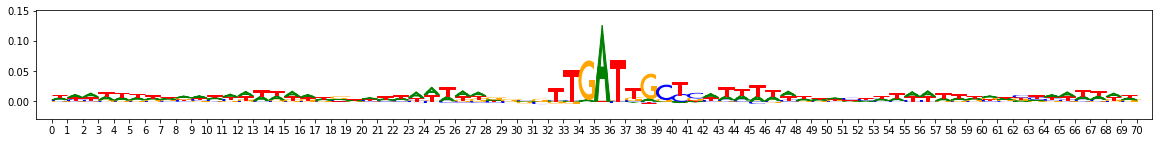

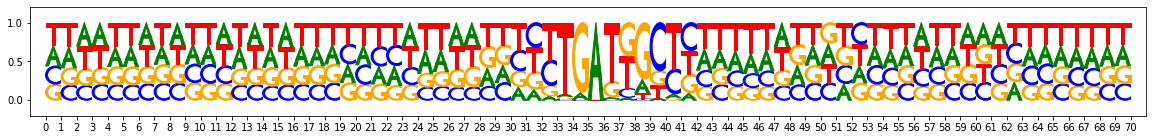

pattern idx 1
2215


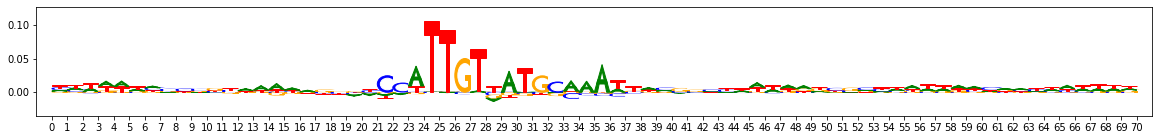

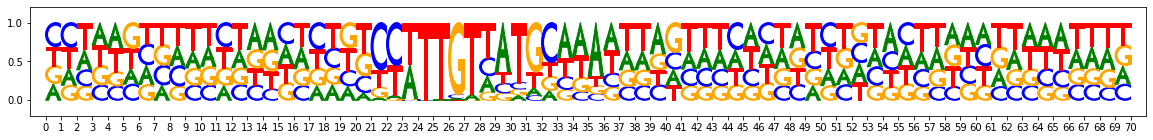

pattern idx 2
1854


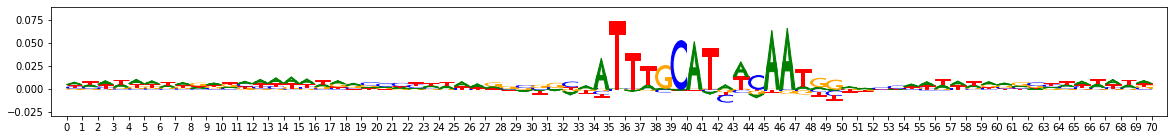

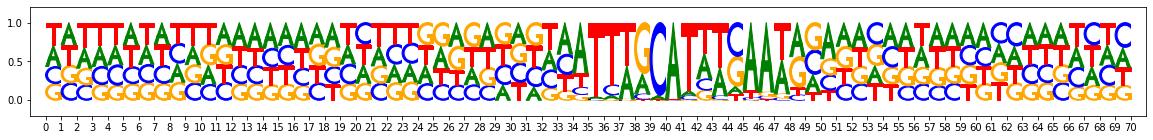

pattern idx 3
1636


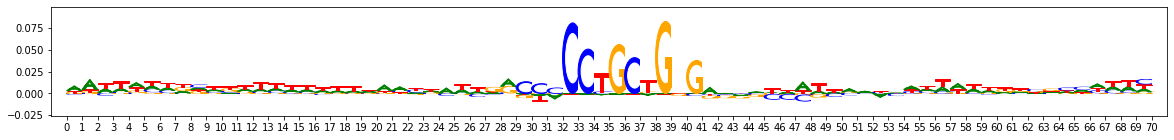

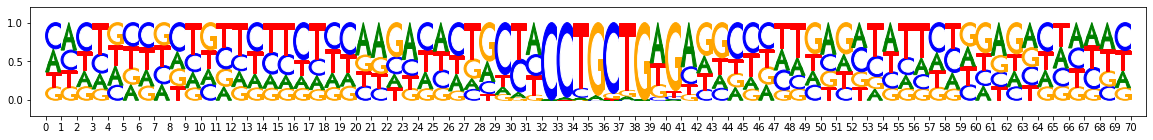

pattern idx 4
937


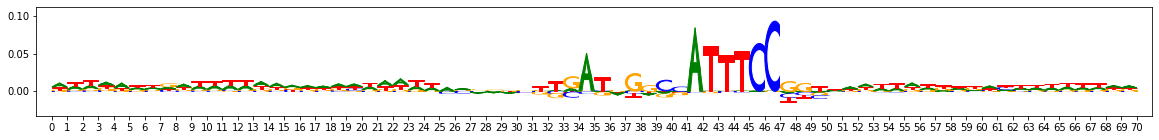

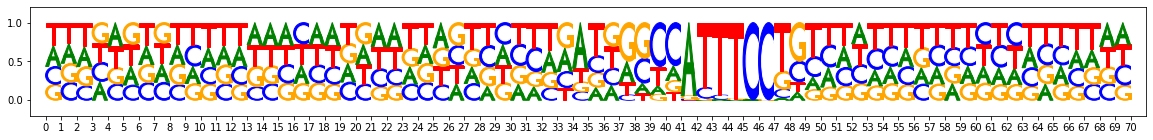

pattern idx 5
749


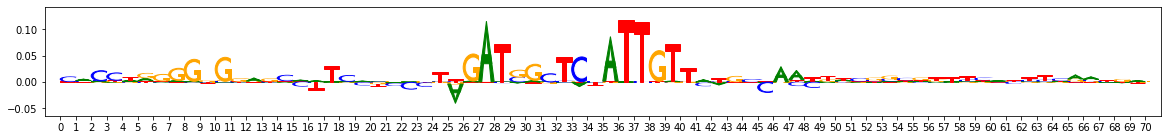

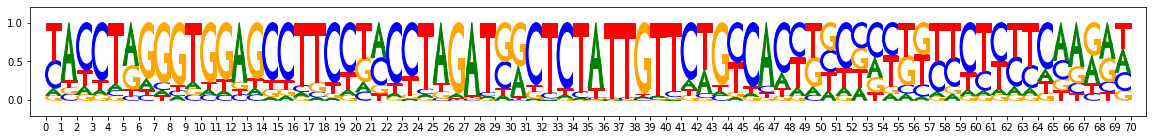

pattern idx 6
466


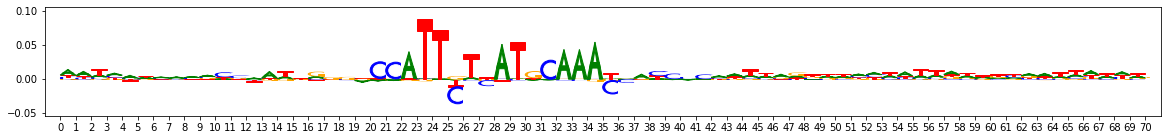

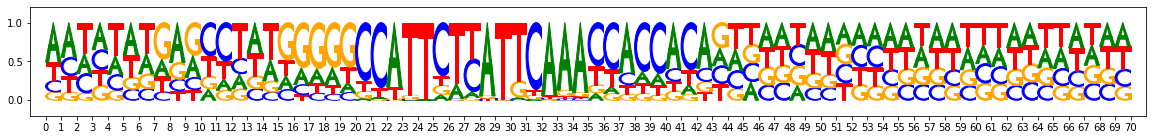

pattern idx 7
231


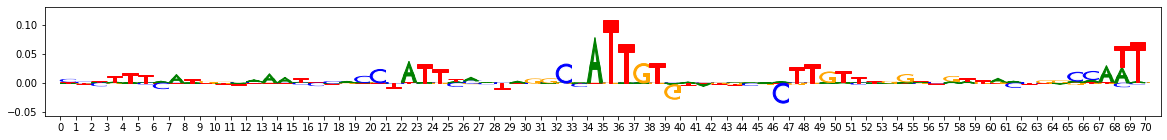

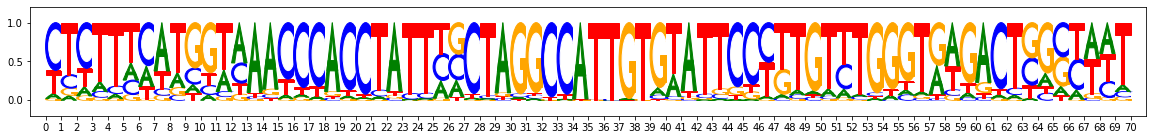

pattern idx 8
191


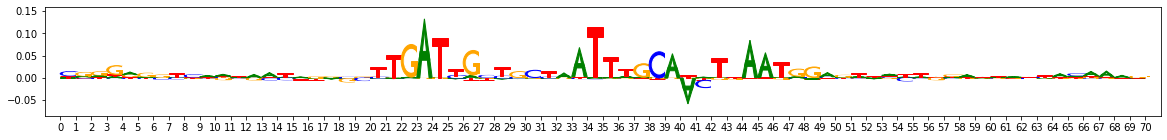

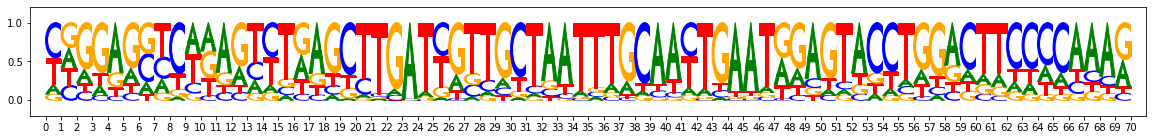

pattern idx 9
187


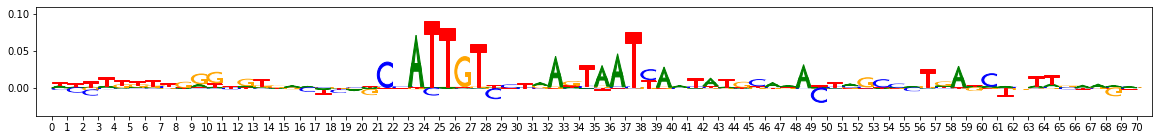

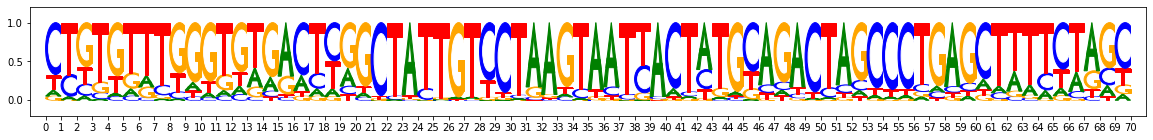

pattern idx 10
142


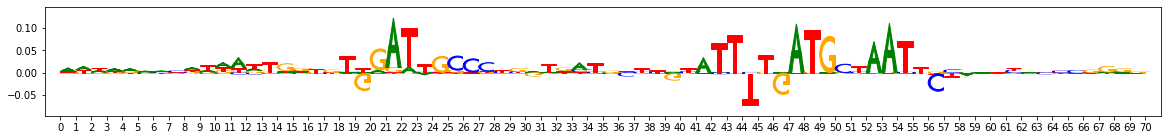

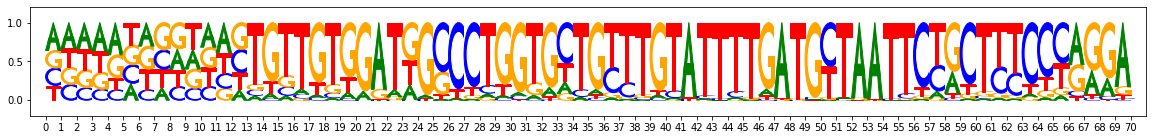

pattern idx 11
117


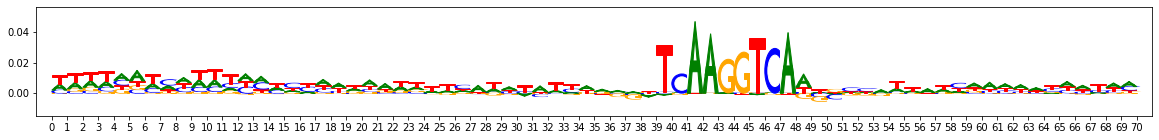

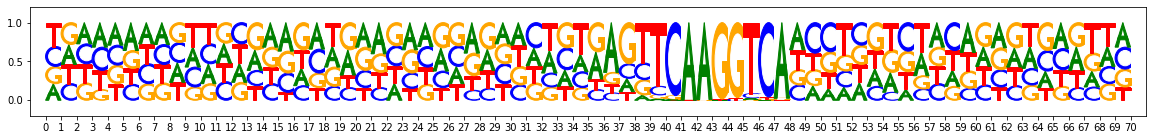

pattern idx 12
89


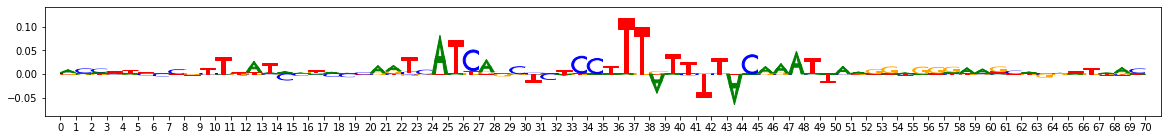

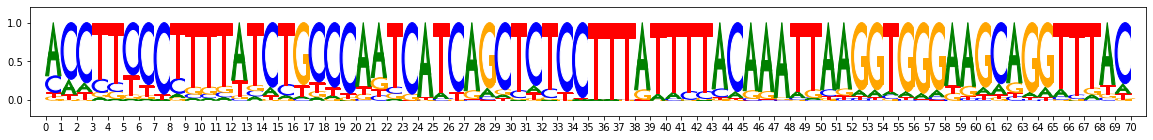

pattern idx 13
105


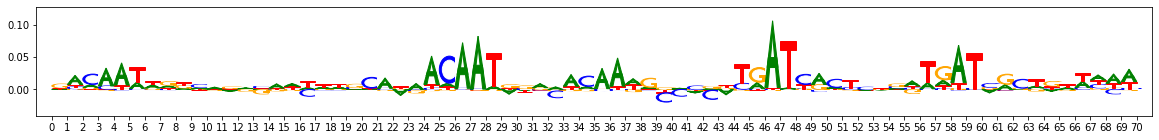

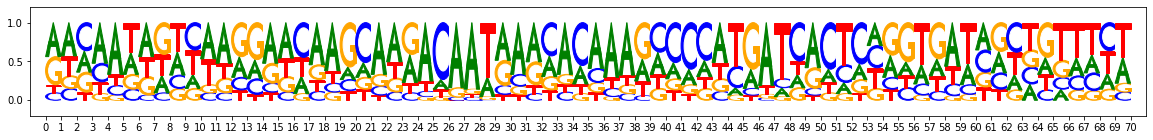

pattern idx 14
105


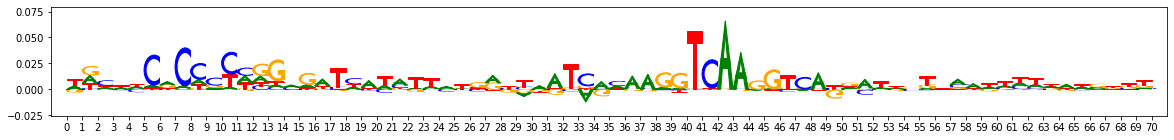

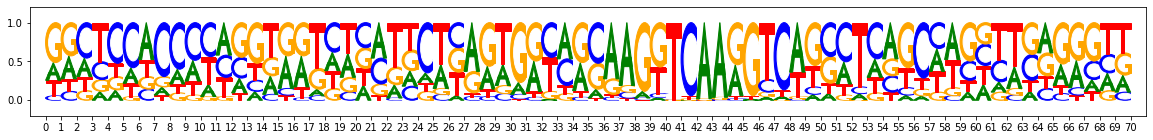

pattern idx 15
65


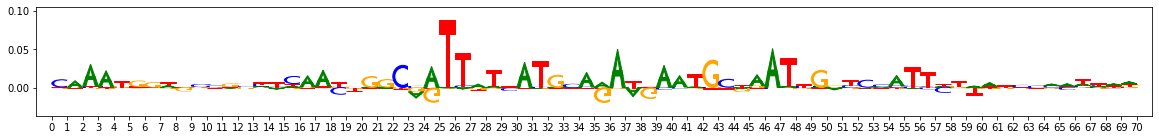

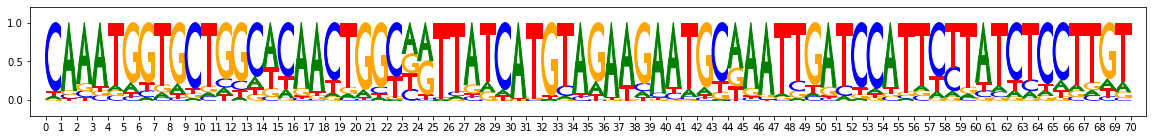

In [9]:
#visualize the patterns:
%matplotlib inline
from modisco.visualization import viz_sequence
for idx,pattern in enumerate(patterns):
    print("pattern idx",idx)
    print(len(pattern.seqlets))
    viz_sequence.plot_weights(
        pattern["Nanog_profile_wn_contrib_scores"].fwd)
    viz_sequence.plot_weights(pattern["sequence"].fwd)

Computing pairwise similarities
Computing tsne embedding
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 937 samples in 0.001s...
[t-SNE] Computed neighbors for 937 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 937 / 937
[t-SNE] Mean sigma: 0.067776
[t-SNE] Computed conditional probabilities in 0.156s
[t-SNE] Iteration 50: error = 90.6289520, gradient norm = 0.4024670 (50 iterations in 0.945s)
[t-SNE] Iteration 100: error = 90.1002426, gradient norm = 0.4201992 (50 iterations in 0.952s)
[t-SNE] Iteration 150: error = 90.4226532, gradient norm = 0.4219930 (50 iterations in 1.046s)
[t-SNE] Iteration 200: error = 92.8009796, gradient norm = 0.4020486 (50 iterations in 0.961s)
[t-SNE] Iteration 250: error = 91.1693649, gradient norm = 0.4046902 (50 iterations in 1.020s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.169365
[t-SNE] Iteration 300: error = 2.4517591, gradient norm = 0.0032986 (50 iterations in 0.720s)
[t-SNE] Iter

<IPython.core.display.Javascript object>


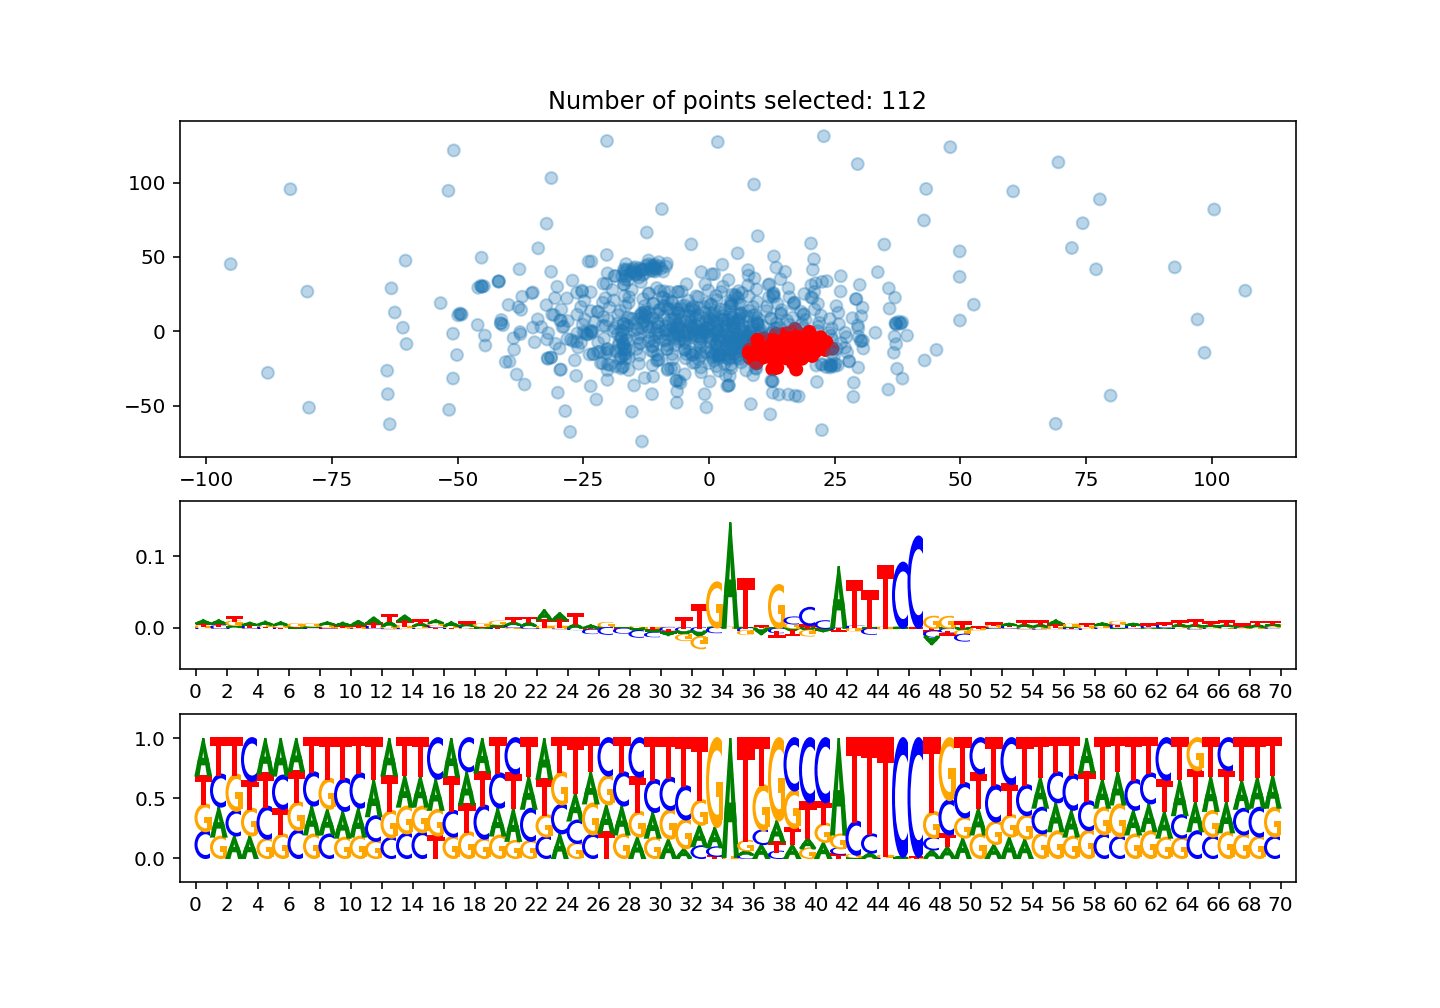

In [11]:
%matplotlib notebook
from importlib import reload
import modisco.visualization
reload(modisco.visualization)
reload(modisco.visualization.interactive)

pattern_idx_to_viz = 4

modisco.visualization.interactive.make_interactive_plot(
    pattern=patterns[pattern_idx_to_viz],
    track_names_and_signs=[("Nanog_profile_wn_contrib_scores", 1)])